# Example 1 - Single Frequency Analysis

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, ACVoltageSource, Capacitor
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.SimpleCircuit.DiagramSolution import single_frequency_solution
from CircuitCalculator.SimpleAnalysis.TimeSeries import steady_state_timedomain_analysis, plot_voltage_timeseries, plot_current_timeseries
from CircuitCalculator.SimpleAnalysis.layout import figure_wide
from CircuitCalculator.SimpleAnalysis.PointerDiagram import pointer_diagram_analysis, plot_power_pointer, plot_voltage_pointer

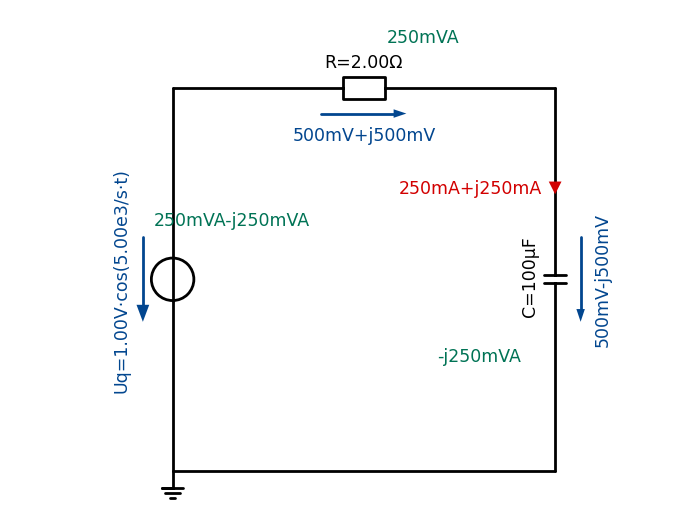

In [2]:
with Schematic(unit=9) as schematic:
    schematic += ACVoltageSource(V=1, w=5000, phi=0.0, name='Uq')
    schematic += Resistor(R=2, name='R').right()
    schematic += Capacitor(C=1e-4, name='C').down()
    schematic += Line().left()
    schematic += Ground()
    schematic_solution = single_frequency_solution(schematic=schematic, w=5000)
    schematic += schematic_solution.draw_voltage('R')
    schematic += schematic_solution.draw_voltage('C')
    schematic += schematic_solution.draw_current('C')
    schematic += schematic_solution.draw_power('R')
    schematic += schematic_solution.draw_power('Uq')
    schematic += schematic_solution.draw_power('C')

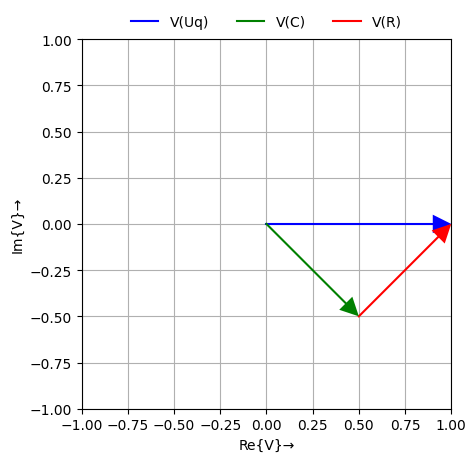

In [3]:
_ = pointer_diagram_analysis(
    circuit_translator(schematic),
    5000,
    figure_wide,
    plot_voltage_pointer('Uq', color='blue'),
    plot_voltage_pointer('C', color='green'),
    plot_voltage_pointer('R', origin='C', color='red'),
)

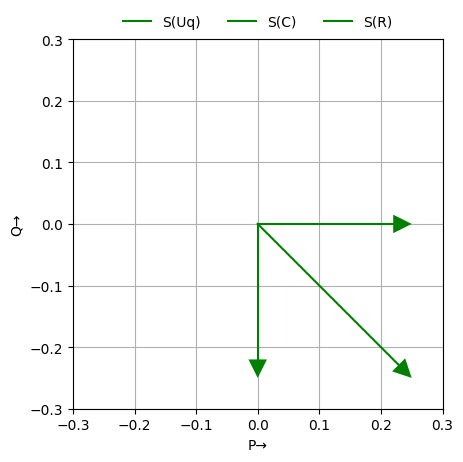

In [4]:
_ = pointer_diagram_analysis(
    circuit_translator(schematic),
    5000,
    figure_wide,
    plot_power_pointer('Uq', pd_lim=(-0.3, 0.3, -0.3, 0.3), color='green'),
    plot_power_pointer('C', pd_lim=(-0.3, 0.3, -0.3, 0.3), color='green'),
    plot_power_pointer('R', pd_lim=(-0.3, 0.3, -0.3, 0.3), color='green')
)

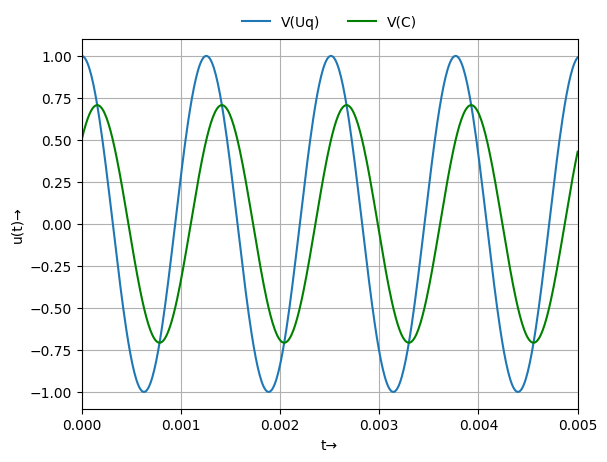

In [5]:
_ = steady_state_timedomain_analysis(
    circuit_translator(schematic),
    figure_wide,
    plot_voltage_timeseries('Uq', 0.005),
    plot_voltage_timeseries('C', 0.005, color='green')
)

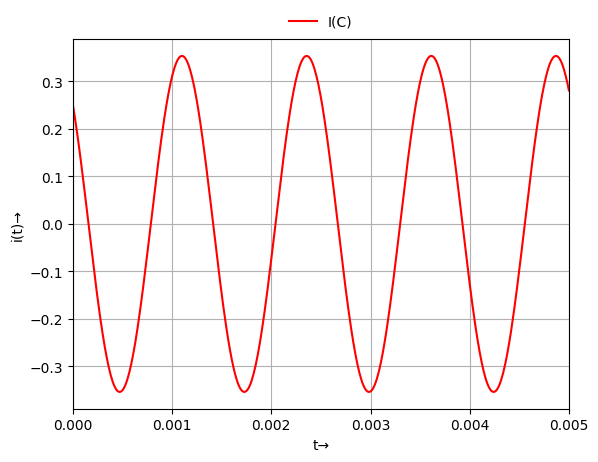

In [6]:
_ = steady_state_timedomain_analysis(
    circuit_translator(schematic),
    figure_wide,
    plot_current_timeseries('C', 0.005, color='red')
)